In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as ticker
from matplotlib.cm import ScalarMappable

import pandas as pd

import py.twoD.continuum2d as continuum2d
c2d = continuum2d.continuum2d()

from py.twoD.params2d import setParams
from py.twoD.analysis2d import computeFPs, checkFixPtsStability, violationType, a_jkValues, lmbd
from py.twoD.turings2d import checkStability
from py.funcs import getSwitchIndex

2d Model initialised.


In [42]:
params_orig = {'xlength': 50, 'ylength': 50, 'sigma_e': 1, 'sigma_i': 3, 'n': 64, 'm': 64}
params_orig = setParams(params_orig)

#rescale the spatial domain by a factor of e-1
params_scaled = {'xlength': 25, 'ylength': 25, 'sigma_e': 1, 'sigma_i': 3, 'n': 64, 'm': 64}
params_scaled = setParams(params_scaled)

In [63]:
i=3
vmin1_old = 0
vmin2_old = 0
vmin3_old = 0
diff1 = 1
diff2 = 1
diff3 = 1

while diff1>0.0001 or diff2>0.0001 or diff3>0.0001:
    params = {'xlength': 25, 'ylength': 25, 'sigma_e': 1, 'sigma_i': 3, 'n': 2**i, 'm': 2**i}
    params = setParams(params)
    ke = params.ke
    ki = params.ki
    combi = params.w_ee*params.ke-params.w_ei*params.ki
    
    vmin1 = np.sum(ke)
    vmin2 = np.sum(ki)
    vmin3 = np.sum(combi)
    
    diff1 = np.abs(vmin1_old-vmin1)
    diff2 = np.abs(vmin2_old-vmin2)
    diff3 = np.abs(vmin3_old-vmin3)
    i+=1
    print('diff_ke=%.5f, diff_ki=%.5f, diff_combi=%.5f for i=%i' %(diff1, diff2, diff3, int(i)))
    vmin1_old=vmin1
    vmin2_old=vmin2
    vmin3_old=vmin3

diff_ke=1.60170, diff_ki=0.99986, diff_combi=2.52582 for i=4
diff_ke=0.60047, diff_ki=0.00006, diff_combi=1.92165 for i=5
diff_ke=0.00123, diff_ki=0.00002, diff_combi=0.00399 for i=6
diff_ke=0.00000, diff_ki=0.00000, diff_combi=0.00001 for i=7


In [44]:
x_orig = params_orig.x #np.roll(params_orig.x, round(params_orig.n/2-1))[::-1]
y_orig = params_orig.y #np.roll(params_orig.y, round(params_orig.m/2-1))[::-1]
ke_orig = params_orig.ke #np.roll(params_orig.ke, round(params_orig.n/2-1))[::-1]
ki_orig = params_orig.ki #np.roll(params_orig.ki, round(params_orig.n/2-1))[::-1]

combi_orig = params_orig.w_ee*ke_orig-params_orig.w_ei*ki_orig

In [45]:
x_scaled = params_scaled.x #np.roll(params_scaled.x, round(params_scaled.n/2-1))[::-1]
y_scaled = params_scaled.y #np.roll(params_scaled.y, round(params_scaled.m/2-1))[::-1]
ke_scaled = params_scaled.ke #np.roll(params_scaled.ke, round(params_scaled.n/2-1))[::-1]
ki_scaled = params_scaled.ki #np.roll(params_scaled.ki, round(params_scaled.n/2-1))[::-1]

combi_scaled = params_scaled.w_ee*ke_scaled-params_scaled.w_ei*ki_scaled

In [46]:
lw=3
fs=20
space_labels_orig=[-25, -12.5, 0, 12.5, 25]
space_labels_scaled=[-12.5, -6.25, 0, 6.25, 12.5]
k_labels = [0, 0.06, 0.12, 0.18]

In [47]:
vmin = np.min(combi_scaled)
diff_ke = np.abs(np.max(ke_scaled) - np.min(ke_scaled))
diff_combi = np.abs(np.max(combi_scaled) - np.min(combi_scaled))
factor =diff_ke/diff_combi

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/2317122292.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=space_labels_orig, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/2317122292.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels=space_labels_orig, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/2317122292.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=space_labels_scaled, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/2317122292.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=space_labels_scaled, fontsize=fs)


[Text(1, 3.36377860253164e-70, '0.0'),
 Text(1, 0.008095039016311409, '8.1'),
 Text(1, 0.016190078032622818, '16.19'),
 Text(1, 0.024285117048934227, '24.29')]

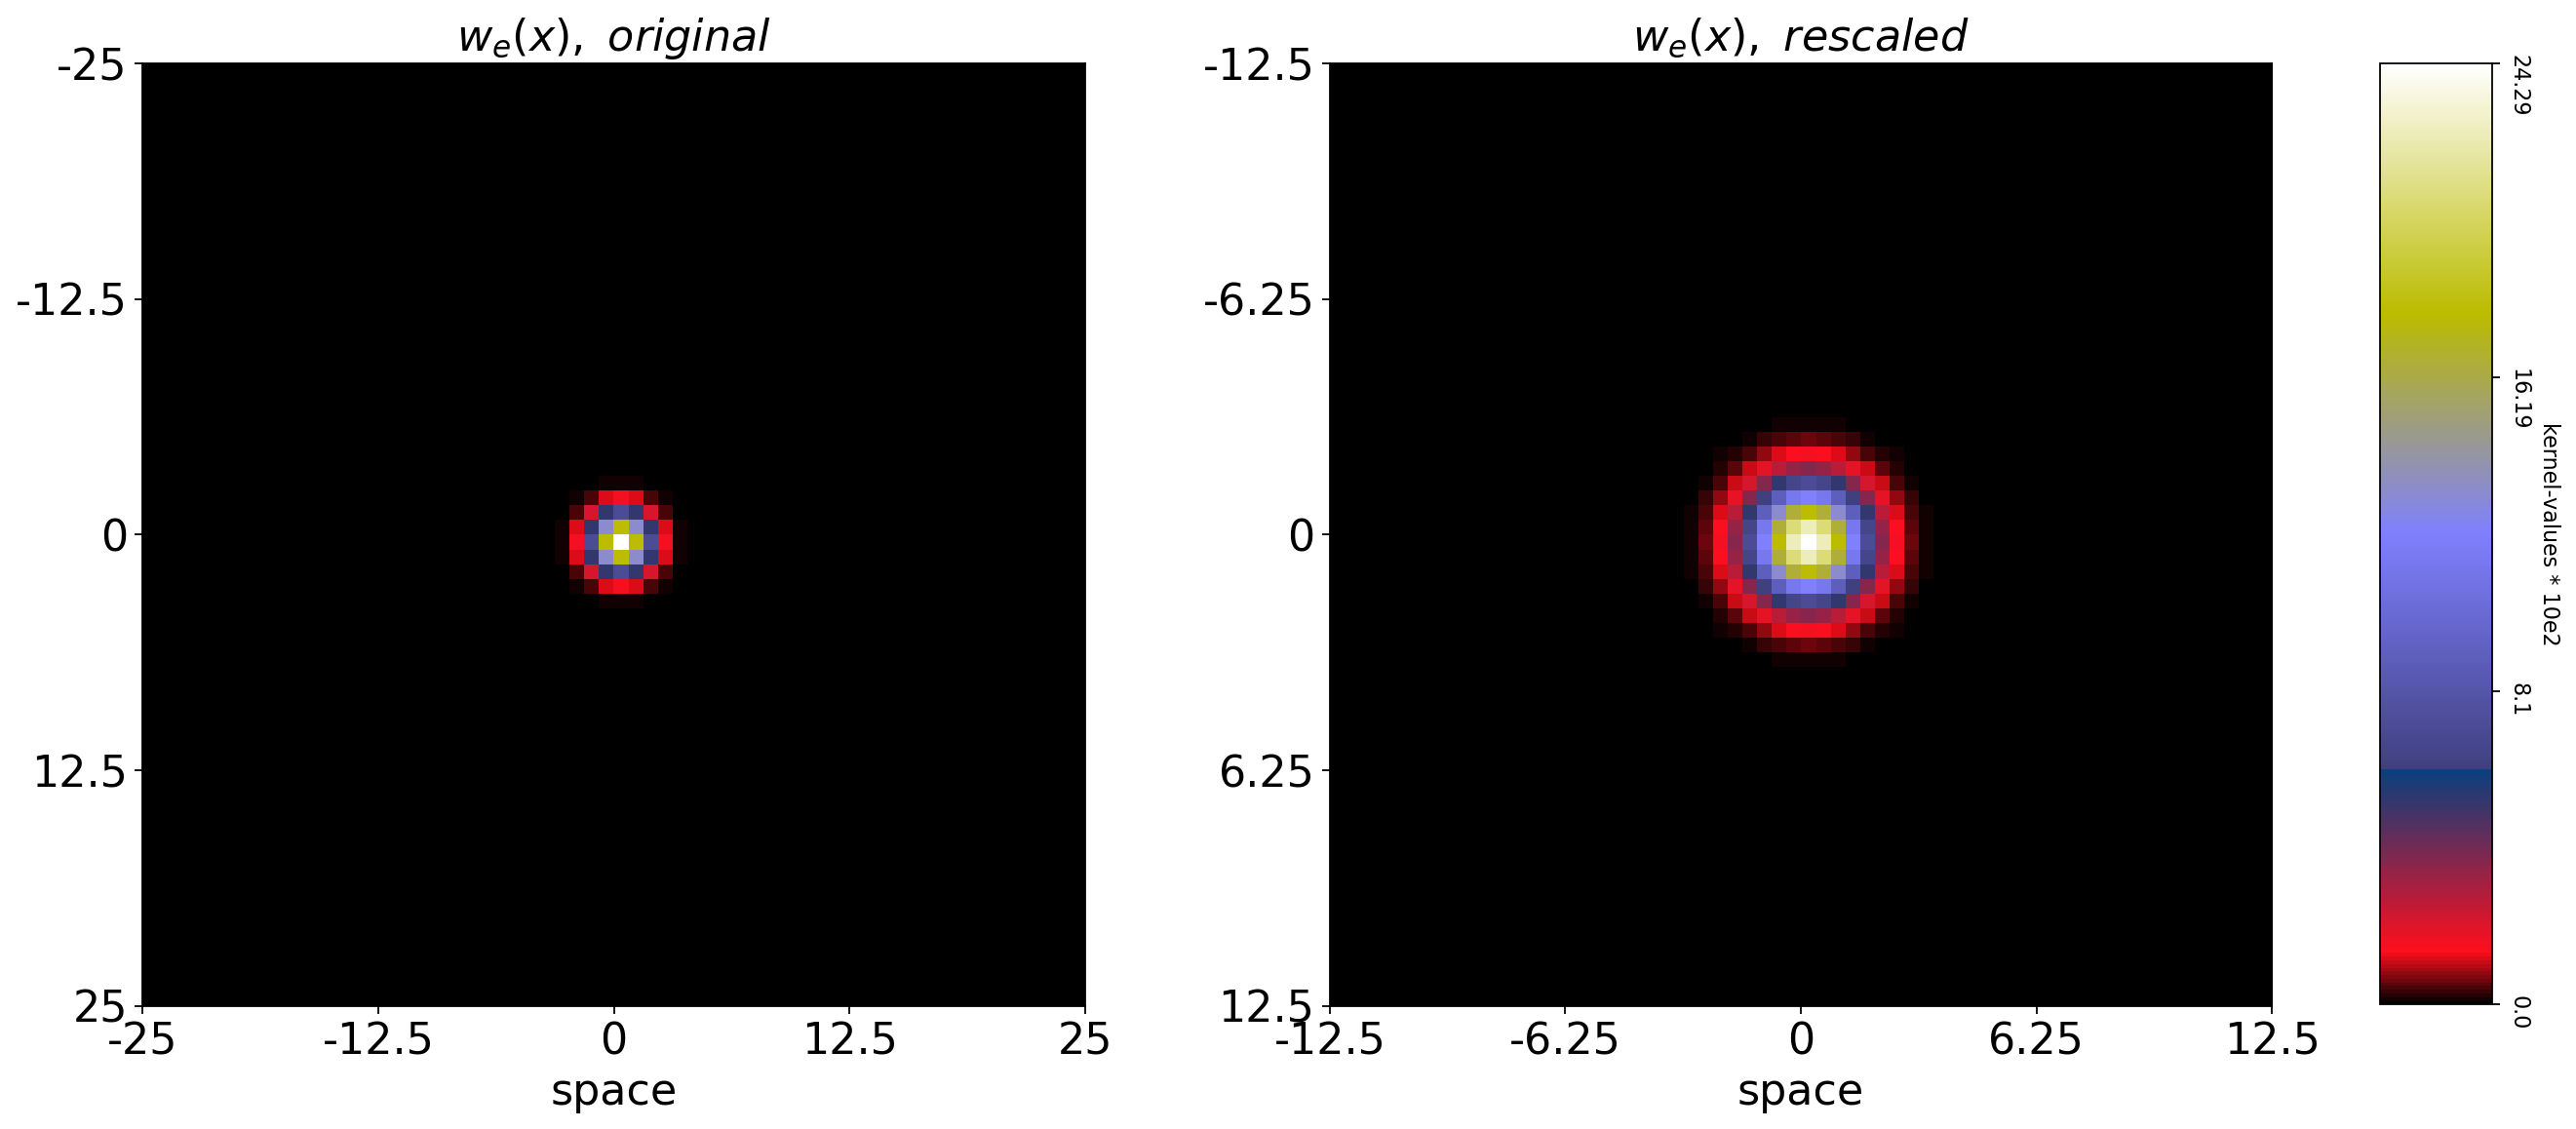

In [48]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,8), dpi=160)

ax0.imshow(ke_orig.T, label=r'$w_e(x),\ original$', 
           vmin=np.min(ke_orig), vmax=np.max(ke_orig), cmap='gist_stern')#, lw=lw, c='orange')
pos = ax1.imshow(ke_scaled.T, label=r'$w_e(x),\ rescaled', 
           vmin=np.min(ke_scaled), vmax=np.max(ke_scaled), cmap='gist_stern')#, lw=lw, c='blue')

ax0.set_title(r'$w_e(x),\ original$', fontsize=20)
ax1.set_title(r'$w_e(x),\ rescaled$', fontsize=20)

ax0.set_xlabel('space', fontsize=fs)
ax0.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels_orig)))
ax0.set_xticklabels(labels=space_labels_orig, fontsize=fs)
    
ax0.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels_orig)))
ax0.set_yticklabels(labels=space_labels_orig, fontsize=fs)

ax1.set_xlabel('space', fontsize=fs)
ax1.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels_scaled)))
ax1.set_xticklabels(labels=space_labels_scaled, fontsize=fs)
    
ax1.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels_scaled)))
ax1.set_yticklabels(labels=space_labels_scaled, fontsize=fs)

cbar_ticks=np.linspace(np.min(ke_scaled), np.max(ke_scaled), 4)
#cbar_ticks=np.around(cbar_ticks, decimals=10)
cbar_labels=np.around(cbar_ticks*10e2, decimals=2)

# Create colorbar
cb_ax = fig.add_axes([.93,.126,.04,.754]) #[left-right; down; width; up]
cbar = ax1.figure.colorbar(pos, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel('kernel-values * 10e2', rotation=-90, va="bottom")
cbar.ax.set_yticklabels(cbar_labels, rotation=-90)

#ax.legend(loc='upper right', fontsize=fs)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/3109004816.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=space_labels_orig, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/3109004816.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels=space_labels_orig, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/3109004816.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=space_labels_scaled, fontsize=fs)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/3109004816.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=space_labels_scaled, fontsize=fs)


[Text(1, -0.003508189875608514, '-3.51'),
 Text(1, 0.021226764774856424, '21.23'),
 Text(1, 0.045961719425321367, '45.96'),
 Text(1, 0.07069667407578631, '70.7')]

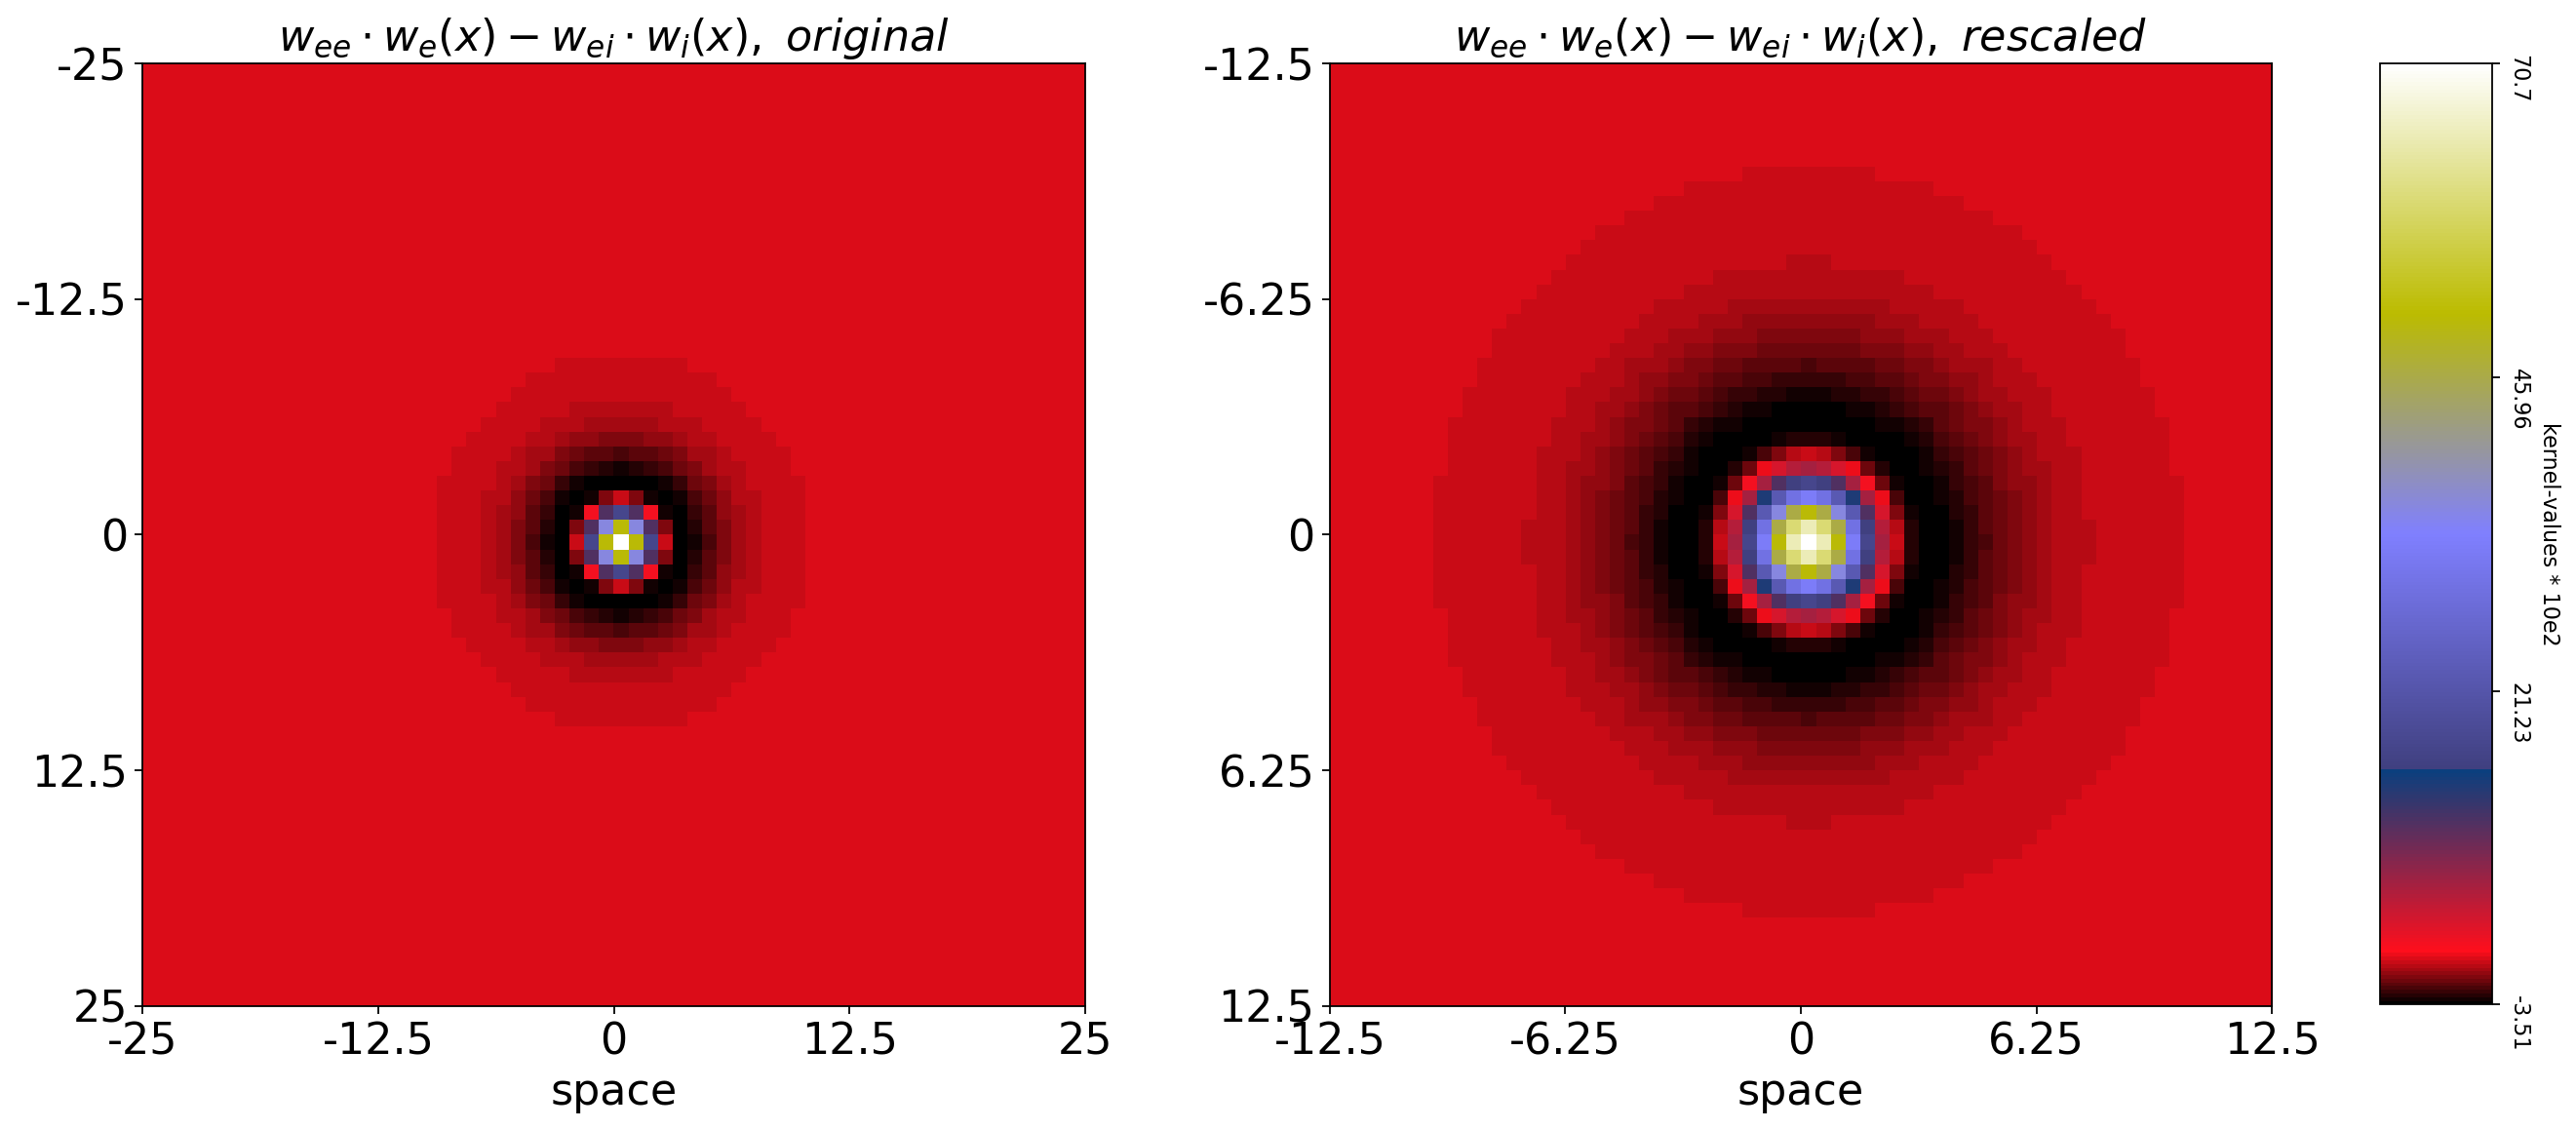

In [49]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(18,8), dpi=160)

ax0.imshow(combi_orig.T, label=r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x),\ original$',  
           vmin=np.min(combi_orig), vmax=np.max(combi_orig), cmap='gist_stern')#, lw=lw, c='orange')
pos = ax1.imshow(combi_scaled.T, label=r'$w_e(x),\ rescaled',  
           vmin=np.min(combi_scaled), vmax=np.max(combi_scaled), cmap='gist_stern')#, lw=lw, c='blue')

ax0.set_title(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x),\ original$', fontsize=20)
ax1.set_title(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x),\ rescaled$', fontsize=20)

ax0.set_xlabel('space', fontsize=fs)
ax0.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels_orig)))
ax0.set_xticklabels(labels=space_labels_orig, fontsize=fs)
    
ax0.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels_orig)))
ax0.set_yticklabels(labels=space_labels_orig, fontsize=fs)

ax1.set_xlabel('space', fontsize=fs)
ax1.xaxis.set_major_locator(ticker.LinearLocator(len(space_labels_scaled)))
ax1.set_xticklabels(labels=space_labels_scaled, fontsize=fs)
    
ax1.yaxis.set_major_locator(ticker.LinearLocator(len(space_labels_scaled)))
ax1.set_yticklabels(labels=space_labels_scaled, fontsize=fs)

cbar_ticks=np.linspace(np.min(combi_scaled), np.max(combi_scaled), 4)
#cbar_ticks=np.around(cbar_ticks, decimals=10)
cbar_labels=np.around(cbar_ticks*10e2, decimals=2)

# Create colorbar
cb_ax = fig.add_axes([.93,.126,.04,.754]) #[left-right; down; width; up]
cbar = ax1.figure.colorbar(pos, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel('kernel-values * 10e2', rotation=-90, va="bottom")
cbar.ax.set_yticklabels(cbar_labels, rotation=-90)

#ax.legend(loc='upper right', fontsize=fs)

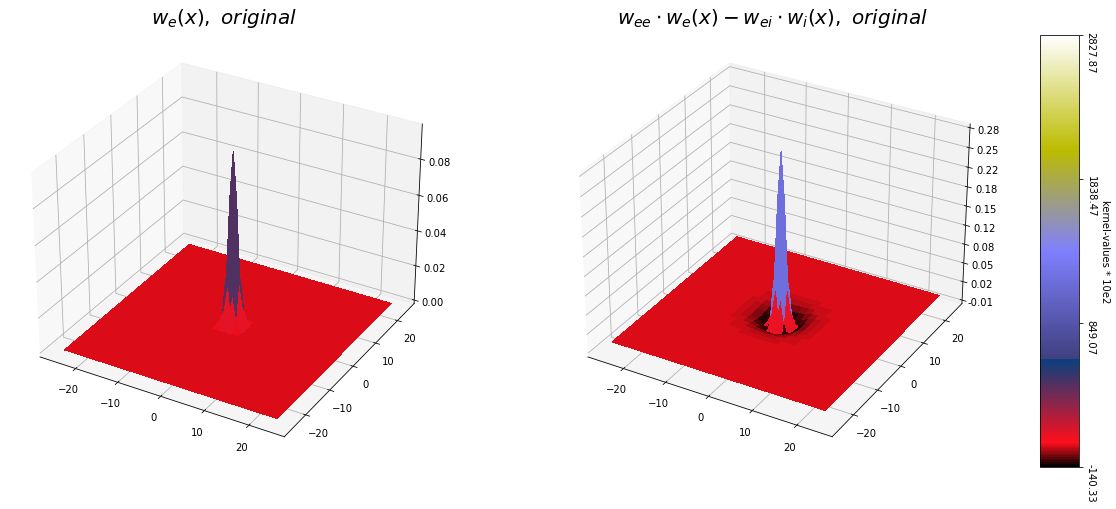

In [50]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

X = params_orig.xcoords
Y = params_orig.ycoords
#Z = params_orig.w_ee*params_orig.ke - params_orig.w_ei*params_orig.ki

fig, (ax0, ax1) = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(18,8))
# Plot the surface.
ax0.plot_surface(X, Y, ke_orig, cmap='gist_stern', vmin=np.min(combi_orig), vmax=np.max(combi_orig), 
                       linewidth=0, antialiased=False)
surf = ax1.plot_surface(X, Y, combi_orig, cmap='gist_stern', vmin=np.min(combi_orig), vmax=np.max(combi_orig), 
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-.01, 0.01)
ax1.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax1.zaxis.set_major_formatter('{x:.02f}')

ax0.set_title(r'$w_e(x),\ original$', fontsize=20)
ax1.set_title(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x),\ original$', fontsize=20)

# Add a color bar which maps values to colors.
cbar_ticks=np.linspace(np.min(combi_orig), np.max(combi_orig), 4)
#cbar_ticks=np.around(cbar_ticks, decimals=10)
cbar_labels=np.around(cbar_ticks*10e3, decimals=2)

# Create colorbar
cb_ax = fig.add_axes([.93,.12,.03,.75]) #[left-right; down; width; up]
cbar = ax1.figure.colorbar(surf, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel('kernel-values * 10e2', rotation=-90, va="bottom")
cbar.ax.set_yticklabels(cbar_labels, rotation=-90)

plt.show()

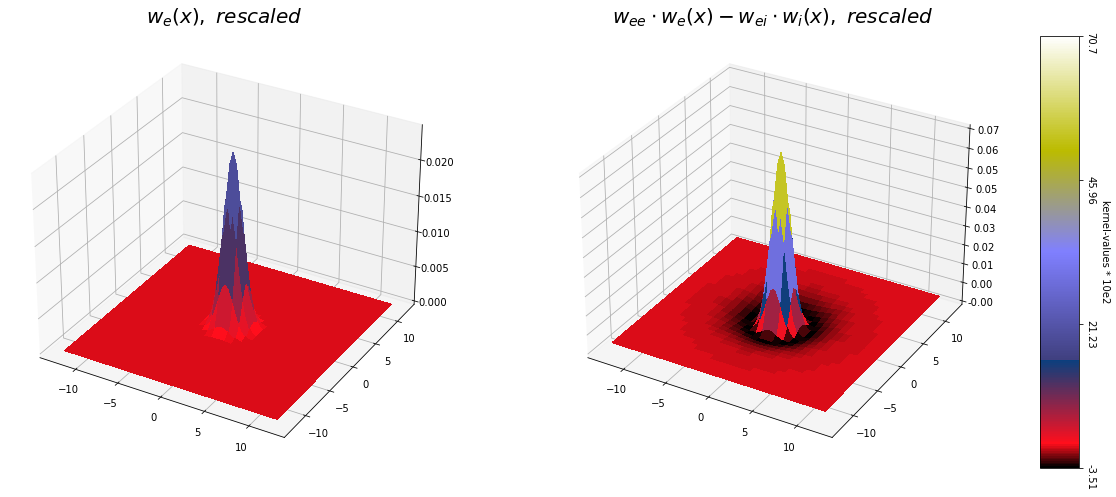

In [51]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

X = params_scaled.xcoords
Y = params_scaled.ycoords

fig, (ax0, ax1) = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(18,8))
# Plot the surface.
ax0.plot_surface(X, Y, ke_scaled, cmap='gist_stern', 
                 vmin=np.min(combi_scaled), vmax=np.max(combi_scaled), 
                 linewidth=0, antialiased=False)
surf = ax1.plot_surface(X, Y, combi_scaled, cmap='gist_stern', 
                        vmin=np.min(combi_scaled), vmax=np.max(combi_scaled), 
                        linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-.01, 0.01)
ax1.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax1.zaxis.set_major_formatter('{x:.02f}')

ax0.set_title(r'$w_e(x),\ rescaled$', fontsize=20)
ax1.set_title(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x),\ rescaled$', fontsize=20)

# Add a color bar which maps values to colors.
cbar_ticks=np.linspace(np.min(combi_scaled), np.max(combi_scaled), 4)
#cbar_ticks=np.around(cbar_ticks, decimals=10)
cbar_labels=np.around(cbar_ticks*10e2, decimals=2)

# Create colorbar
cb_ax = fig.add_axes([.93,.12,.03,.75]) #[left-right; down; width; up]
cbar = ax1.figure.colorbar(surf, ax=ax1, ticks=cbar_ticks, cax=cb_ax)
cbar.ax.set_ylabel('kernel-values * 10e2', rotation=-90, va="bottom")
cbar.ax.set_yticklabels(cbar_labels, rotation=-90)


plt.show()

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_4391/977805879.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=12)


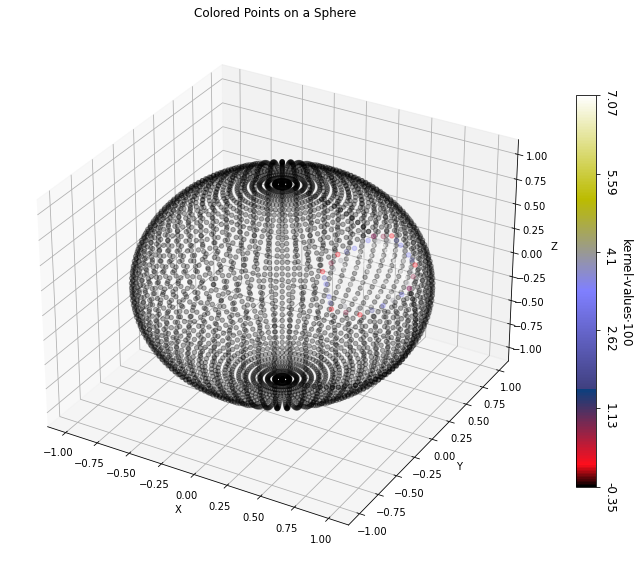

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_sphere_points(num_points):
    phi = np.linspace(0, np.pi, num_points)
    theta = np.linspace(0, 2 * np.pi, num_points)
    
    phi, theta = np.meshgrid(phi, theta)
    
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    
    return x.flatten(), y.flatten(), z.flatten()


def plot_colored_sphere(x, y, z, values):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    
    # Normalize values to use for colormap
    #norm = plt.Normalize(values.min(), values.max())
    color_factor = 100
    colors = plt.cm.gist_stern(values.flatten()*color_factor)
    
    surf = ax.scatter(x, y, z, s=20, c=colors, marker='o', alpha=0.3)
    
    # Create a colorbar for reference
    sm = plt.cm.ScalarMappable(cmap=plt.cm.gist_stern)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.6)
    cbar.set_label('kernel-values' + r'$\cdot10e2$', fontsize=12)
    
    ax.set_title(r'$w_{ee}\cdot w_e(x)-w_{ei}\cdot w_i(x),\ original$', fontsize=20)
    
    # Add a color bar which maps values to colors.
    cbar_ticks=np.linspace(np.min(values*color_factor), np.max(values*color_factor), 6)
    cbar_labels=np.around(cbar_ticks, decimals=2)
    cbar.ax.set_yticklabels(cbar_labels, rotation=-90, fontsize=12)
    cbar.ax.set_ylabel('kernel-values' + r'$\cdot%i$' %color_factor, rotation=-90, va="bottom", fontsize=12)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Colored Points on a Sphere')
    
    plt.show()

    
    
# Number of points on the sphere
num_points = params_orig.n#*params_orig.m

# Generate equally distributed points on a sphere
x, y, z = generate_sphere_points(num_points)


scale = 0.55
x = np.roll(x, int(len(x)*scale))
y = np.roll(y, int(len(y)*scale))
z = np.roll(z, int(len(z)*scale))

# Generate a 2D array for color values (replace this with your own data)
values = combi_scaled#np.random.rand(num_points, num_points)

# Plot the colored points on the sphere
plot_colored_sphere(x, y, z, values)

In [53]:
plt.cm.viridis(values.flatten()*100).T

array([[0.267004, 0.267004, 0.267004, ..., 0.267004, 0.267004, 0.267004],
       [0.004874, 0.004874, 0.004874, ..., 0.004874, 0.004874, 0.004874],
       [0.329415, 0.329415, 0.329415, ..., 0.329415, 0.329415, 0.329415],
       [1.      , 1.      , 1.      , ..., 1.      , 1.      , 1.      ]])

In [54]:
combi_orig.shape

(64, 64)

In [55]:
x.shape

(4096,)

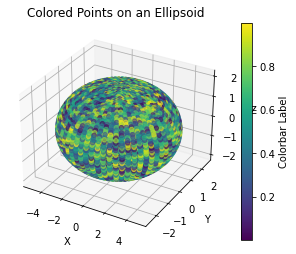

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_ellipsoid_points(num_points_x, num_points_y, a, b, c):
    phi = np.linspace(0, 2 * np.pi, num_points_x)
    theta = np.linspace(0, np.pi, num_points_y)
    
    phi, theta = np.meshgrid(phi, theta)
    
    x = a * np.sin(theta) * np.cos(phi)
    y = b * np.sin(theta) * np.sin(phi)
    z = c * np.cos(theta)
    
    # Flatten the arrays
    x, y, z = x.flatten(), y.flatten(), z.flatten()
    
    return x, y, z

def plot_colored_ellipsoid(x, y, z, values):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Normalize values to use for colormap
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.viridis(norm(values.flatten()))
    
    ax.scatter(x, y, z, s=20, c=colors, marker='o', alpha=0.6)
    
    # Create a colorbar for reference
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Colorbar Label')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Colored Points on an Ellipsoid')
    
    plt.show()

# Number of points in the x and y directions
num_points_x = params_orig.n
num_points_y = params_orig.m

# Semiaxis lengths of the ellipsoid
a = 5.0
b = 2.5
c = 2.0

# Generate points on the surface of an ellipsoid
x, y, z = generate_ellipsoid_points(num_points_x, num_points_y, a, b, c)

# Generate a 2D array for color values (replace this with your own data)
values = np.random.rand(num_points_x, num_points_y)

# Plot the colored points on the ellipsoid
plot_colored_ellipsoid(x, y, z, values)
